In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
S = np.array(range(1,51))
def stemSimulation(divisionRate,epsilon,S):
    k = divisionRate*epsilon    
    t = np.zeros(len(S))
    for i in range(len(S)):
        random.seed()
        r = random.random()
        t[i] = np.log(1/r)/(S[i]*k)
#         print(A[i])
#         print(t[i])
    return(np.cumsum(t))

CPU times: user 3.35 ms, sys: 13.7 ms, total: 17 ms
Wall time: 16.3 ms


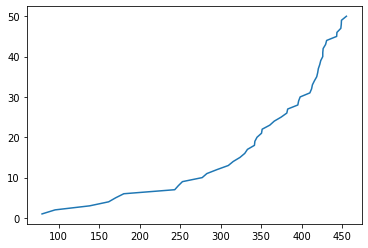

In [3]:
%time stemDivTime = stemSimulation(0.1,0.1,S)
plt.plot(stemDivTime,S)

In [4]:
class cell:
    def __init__(self,initialCell,stem,epsilon,randomNumberGenerator):
        self.currentTime = initialCell
        self.stem = stem
        self.epsilon = epsilon
        self.rng = randomNumberGenerator
        self.lifetime = 0
        self.birthtime = self.currentTime
        self.siblings = []
         
    def simulateStemCell(self,maxSimulation):
        cont = True
        while(cont):
            r = random.random()            
            if self.currentTime > maxSimulation:
                cont = False
            else:
                if self.stem:
#                     division time for stem cell
                    self.currentTime += np.log(1/r)/0.1        
#                     cell(initialCell,stem,epsilon,randomNumberGenerator)
                    sibling = cell(self.currentTime,self.stem,self.epsilon,self.rng)
                    rand = self.rng.random()
                    if rand < self.epsilon:
                        pass
                    else:
                        sibling.stem = False
                    self.siblings.append(sibling)
                else:
#                     division time for progenitor cell
                    self.currentTime += np.log(1/r)/1.5
            self.lifetime = self.currentTime

In [5]:
def simulateStemCloneCore(initialCell,cellFate,parent,nameMarker,maxSimulation):
    # simulation for the initial stem cell (self)         
    initialCell.simulateStemCell(maxSimulation)
    nameMarker[0]+=1
    name = nameMarker[0]
    cellFate.append((initialCell.birthtime,
                    initialCell.lifetime,
                    initialCell.stem))     
    # simulation for the sibling cell (self.sibling)
    for sibling in initialCell.siblings:
        simulateStemCloneCore(sibling,cellFate,name,nameMarker,maxSimulation)
    return(cellFate)

def simulateStemClone(initialCell,maxSimulation):
    return(simulateStemCloneCore(initialCell=initialCell,cellFate=[],parent=-1,nameMarker=[-1],maxSimulation=maxSimulation))

def cellDivisionTimeSeries(cellfate):
    i = np.transpose(cellfate)[-1]
    index = i == 1
    birthtime = np.transpose(cellfate)[0][index]
    deathtime = np.transpose(cellfate)[1][index]
    time = np.sort(np.unique(np.append(birthtime, deathtime)))
    N = []
    for t in time:
        if t not in deathtime:
            N = np.append(N, 1)
        elif t not in birthtime:
            N = np.append(N, -1)
        else:
            N = np.append(N, 0)
    return{"time": time,"size": np.cumsum(N)}

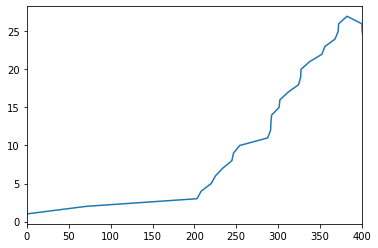

In [6]:
stem = cell(initialCell=0, stem=True, epsilon=0.1, randomNumberGenerator=random)
stemCellFate = simulateStemClone(initialCell=stem,maxSimulation=400)
stemCell = cellDivisionTimeSeries(stemCellFate)
plt.plot(stemCell["time"], stemCell["size"])
plt.xlim((0,400))
plt.show()

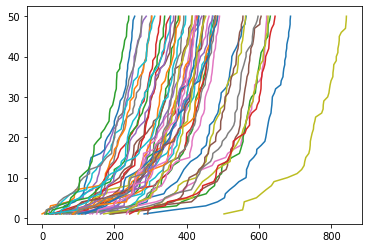

In [7]:
def multiClonalSimulation(divRate, epsilon):
    simulation = 50
    S = np.array(range(1,51))
#     size = np.zeros(simulation)
    for i in range(simulation):
        random.seed(i)
        clonalSimulationTime = stemSimulation(divRate,epsilon,S)
        plt.plot(clonalSimulationTime,S)
#         time[i] = stemCell["time"][-1]
#     plt.hist(time)
    plt.show()
    
multiClonalSimulation(divRate=0.1, epsilon=0.1)

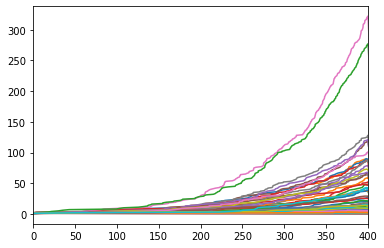

In [8]:
def multiCellSimulation(epsilon):
    simulation = 50
#     time = np.zeros(simulation)
    for i in range(simulation):
        random.seed(i)
        stem = cell(initialCell=0, stem=True, epsilon=epsilon, randomNumberGenerator=random)
        stemCellFate = simulateStemClone(initialCell=stem,maxSimulation=400)
        stemCell = cellDivisionTimeSeries(stemCellFate)
        plt.plot(stemCell["time"], stemCell["size"])
        plt.xlim((0,400))
#         time[i] = stemCell["time"][-1]
#     plt.hist(time)
    plt.show()
    
multiCellSimulation(epsilon=0.1)